# Assignment 5: Exploratory Data Analysis and Hypothesis Testing

**Student:** Katelyn Zhuo  
**Dataset:** Online Shoppers        
**Date:** 10/8/25

## Objective
Perform exploratory data analysis (EDA) and hypothesis testing on your chosen dataset. Identify patterns and test meaningful hypotheses about relationships between variables.

---


## 1. Import Data and Libraries

Import the necessary libraries and load your dataset.


In [54]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set up plotting
plt.style.use('default')
sns.set_palette("husl")

print("Libraries imported successfully!")


Libraries imported successfully!


In [55]:
df = pd.read_csv('online_shoppers_intention.csv')
print(f"Dataset shape: {df.shape}")
df.head()


Dataset shape: (12330, 18)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


## 2. Exploratory Data Analysis (EDA)

Explore your dataset to understand its structure and identify patterns.


In [56]:
# Basic dataset information
print("=== DATASET OVERVIEW ===")
print(f"Shape: {df.shape}")
print(f"\nData types:")
print(df.dtypes)
print(f"\nMissing values:")
print(df.isnull().sum())
print(f"\nBasic statistics:")
df.describe()


=== DATASET OVERVIEW ===
Shape: (12330, 18)

Data types:
Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

Missing values:
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay           

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


=== REVENUE VARIABLE ===
Revenue distribution:
Revenue
0    10422
1     1908
Name: count, dtype: int64


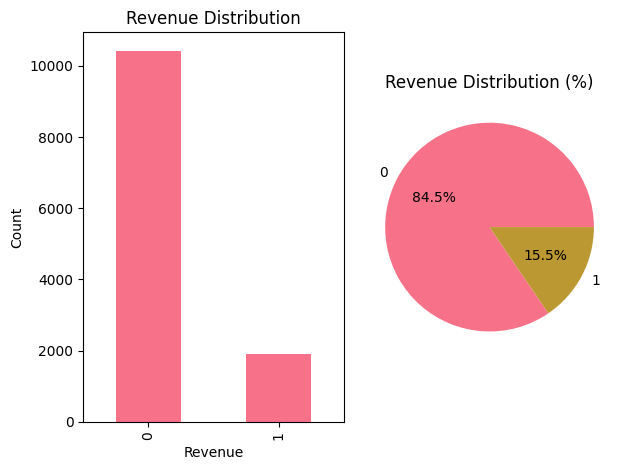

In [57]:
df.drop(['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated_Duration', 'PageValues' ], axis=1, inplace=True)

# Target variable analysis
print("=== REVENUE VARIABLE ===")
revenue_counts = df['Revenue'].astype(int).value_counts()
print(f"Revenue distribution:")
print(revenue_counts)

# Visualize target distribution
#plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
revenue_counts.plot(kind='bar')
plt.title('Revenue Distribution')
plt.xlabel('Revenue')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
plt.pie(revenue_counts.values, labels=revenue_counts.index, autopct='%1.1f%%')
plt.title('Revenue Distribution (%)')

plt.tight_layout()
plt.show()


The distribution between sessions that ended in revenue and those that didn't are vastly different. 15.5% having revenue is kind of low but, I don't have a good grasp on the market and I'm unsure if this is average. I also decided to drop a few of the coloumns that I thought were less important.

=== NUMERICAL VARIABLES ===
Numerical columns: ['ProductRelated', 'BounceRates', 'ExitRates', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType']


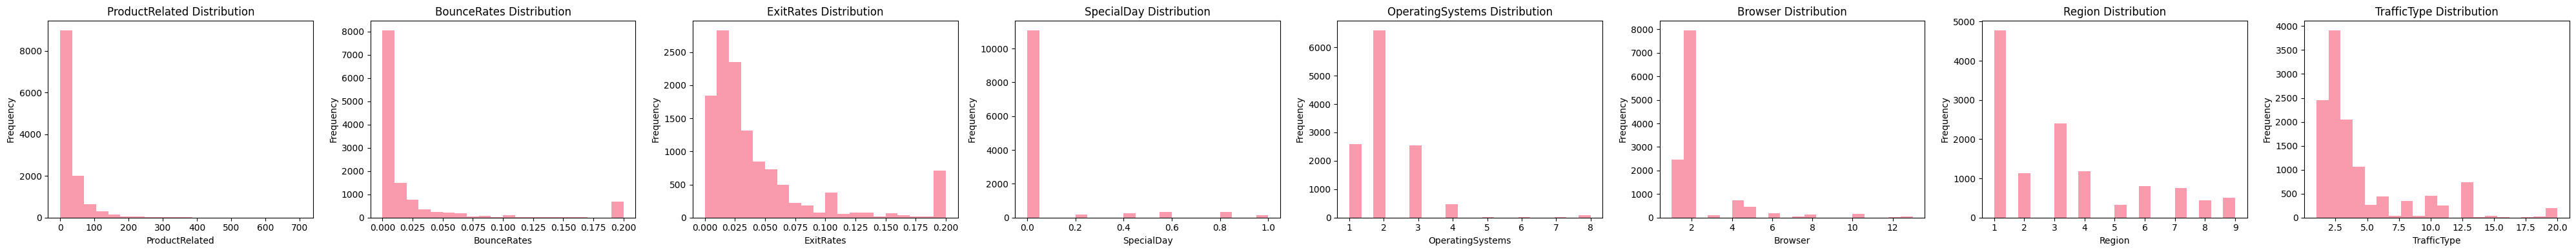

In [58]:
# Numerical variables analysis
print("=== NUMERICAL VARIABLES ===")
numerical_cols = df.select_dtypes(include=[np.number]).columns
print(f"Numerical columns: {list(numerical_cols)}")

# Create histograms for numerical variables
fig, axes = plt.subplots(1, len(numerical_cols), figsize=(5*len(numerical_cols), 4))
if len(numerical_cols) == 1:
    axes = [axes]

for i, col in enumerate(numerical_cols):
    axes[i].hist(df[col], bins=20, alpha=0.7)
    axes[i].set_title(f'{col} Distribution')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


All of the data in these histograms are skewed to the left and the smaller values are alot more common. The ammount of larger values are tiny in comparision.

=== CATEGORICAL VARIABLES ===
Categorical columns: ['Month', 'VisitorType']

Month value counts:
Month
May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: count, dtype: int64


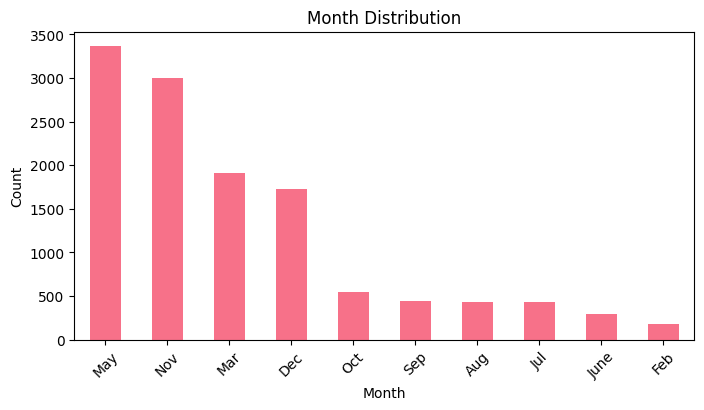


VisitorType value counts:
VisitorType
Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: count, dtype: int64


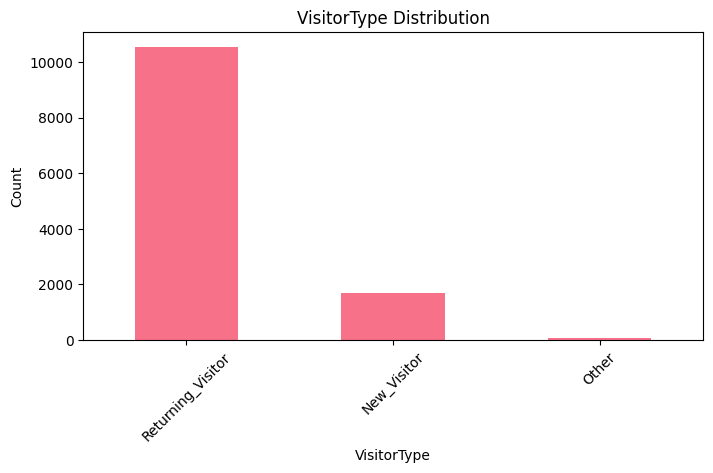

In [59]:
# Categorical variables analysis
print("=== CATEGORICAL VARIABLES ===")
categorical_cols = df.select_dtypes(include=['object']).columns
print(f"Categorical columns: {list(categorical_cols)}")

for col in categorical_cols:
    print(f"\n{col} value counts:")
    print(df[col].value_counts())

    # Create bar plot
    plt.figure(figsize=(8, 4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


I find it very interesting that May is the month with the most visits, maybe people like shopping for the summer. One reason I can think of is spring sales where companies will have dicounts to make space for new stock. Months like november and december make alot more sense due to events like the holidays. It's also interesting to see that this site has many returning visitors, signaling that this website is good and people like it enough to return.

=== CORRELATION ANALYSIS ===


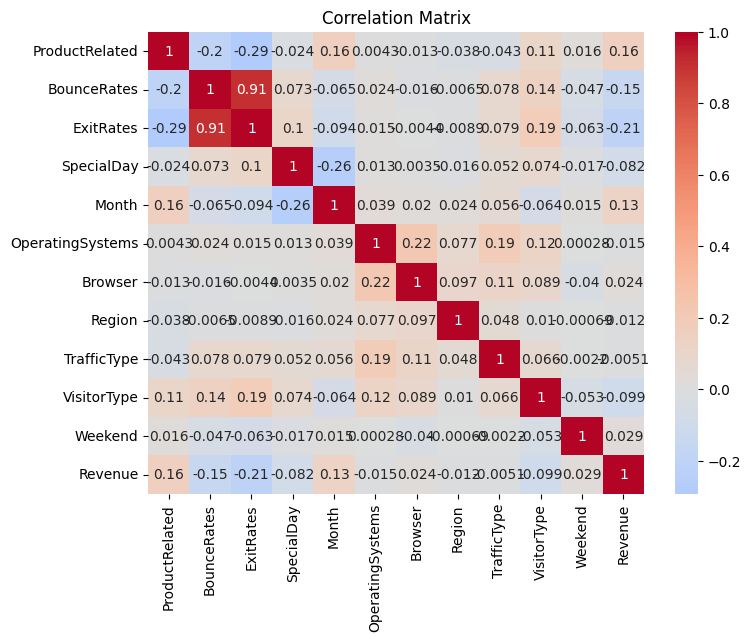

In [60]:
month_map = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4,
    'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8,
    'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}

df['Month'] = df['Month'].map(month_map)

visitor_map = {
    'New_Visitor': 1, 'Returning_Visitor': 2, 'Other': 3
}

df['VisitorType'] = df['VisitorType'].map(visitor_map)

# Correlation analysis
print("=== CORRELATION ANALYSIS ===")
correlation_matrix = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

# Show correlations with target variable
if 'target' in df.columns:
    target_correlations = correlation_matrix['Revenue'].sort_values(ascending=False)
    print("\nCorrelations with revenue variable:")
    print(target_correlations)


I had to turn columns like month and traffic type to numbers so they could be included in the conrrelation matrix. Overall, it doesnt seem like correlation is very high except for bounce and exit rates which makes sense because exit rates probably account for bounce rates as well.

=== RELATIONSHIPS WITH REVENUE ===


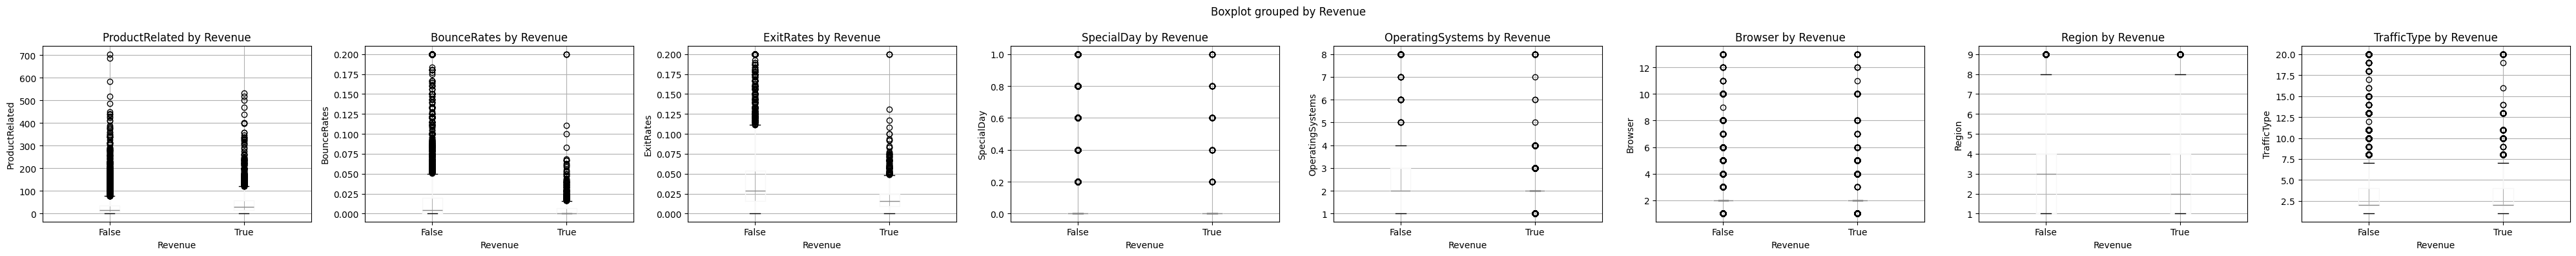


Month vs Revenue:
Revenue  False  True 
Month                
2.0      0.984  0.016
3.0      0.899  0.101
5.0      0.891  0.109
7.0      0.847  0.153
8.0      0.824  0.176
9.0      0.808  0.192
10.0     0.791  0.209
11.0     0.746  0.254
12.0     0.875  0.125

VisitorType vs Revenue:
Revenue      False  True 
VisitorType              
1            0.751  0.249
2            0.861  0.139
3            0.812  0.188


In [61]:
# Relationship between variables and target
print("=== RELATIONSHIPS WITH REVENUE ===")

# Box plots for numerical variables vs target
numerical_cols_no_revenue = [col for col in numerical_cols if col != 'Revenue']

if len(numerical_cols_no_revenue) > 0:
    fig, axes = plt.subplots(1, len(numerical_cols_no_revenue), figsize=(5*len(numerical_cols_no_revenue), 4))
    if len(numerical_cols_no_revenue) == 1:
        axes = [axes]

    for i, col in enumerate(numerical_cols_no_revenue):
        df.boxplot(column=col, by='Revenue', ax=axes[i])
        axes[i].set_title(f'{col} by Revenue')
        axes[i].set_xlabel('Revenue')
        axes[i].set_ylabel(col)

    plt.tight_layout()
    plt.show()

# Crosstabs for categorical variables vs revenue
for col in categorical_cols:
    print(f"\n{col} vs Revenue:")
    crosstab = pd.crosstab(df[col], df['Revenue'], normalize='index')
    print(crosstab.round(3))


These box plots further support the idea that bounce and exit rates are correlated to revenue as seen in the correlation matrix. Some of the other relation ships like special day and reigion are unclear.

## 3. Hypothesis Formulation

Based on your EDA, formulate **2-3 testable hypotheses**. Each hypothesis should be:
- Clear and specific
- Testable with statistical methods
- Grounded in your observations

### Hypothesis 1: [Your first hypothesis]
**H1:** There is a nagative correlation between bounce rates and revenue.
- **Null Hypothesis (H0):** There is no correlation between bounce rates and revenue.
- **Alternative Hypothesis (H1):** There is a correlation between revenue and bounce rates.
- **Rationale:** If a customer is leaving the site (bouncing) without triggering any other requests to the analytics sever, it would make sense that they did not make a purchase and therefore, there was not revenue made. The correlation matrix shows -0.15 correlation between bounce rates and revenue.

### Hypothesis 2: [Your second hypothesis]
**H2:** There is a positive correlation between the month and revenue.
- **Null Hypothesis (H0):** There is no correlation between month and revenue.
- **Alternative Hypothesis (H1):** There is a correlation between months and revenue.
- **Rationale:** During months like November and December, people might be more likely to buy items for holidays like Christmas, therefore allowing the company to make more revenue. The correlation matrix shows 0.13 correlation between month and revenue.

---


## 4. Hypothesis Testing

Test each hypothesis using appropriate statistical methods. For each test, explain:
- Why you chose this test
- The results and interpretation
- Whether you reject or fail to reject the null hypothesis


### Testing Hypothesis 1: [Your first hypothesis]

**Test Choice:** [t-test, chi-square, correlation, etc.]
- **Why appropriate:** The t-test is able to compare the mean of bouce rates between the two revenue groups. Which shows if the average bounce rate is signifigantly different between those who generated revenue and those who did not.


In [ ]:
# Hypothesis 1 Testing
print("=== TESTING HYPOTHESIS 1 ===")

group1 = df[df['Revenue'] == 0]['BounceRates']
group2 = df[df['Revenue'] == 1]['BounceRates']
t_stat, p_value = stats.ttest_ind(group1, group2)
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject H0: There is a significant difference")
else:
    print("Fail to reject H0: No significant difference")

print("There is a correlation between revenue and bounce rates.")


=== TESTING HYPOTHESIS 1 ===
t-statistic: 16.9226
p-value: 0.0000
Reject H0: There is a significant difference
There is a correlation between revenue and bounce rates.


### Testing Hypothesis 2: [Your second hypothesis]

**Test Choice:** [t-test, chi-square, correlation, etc.]
- **Why appropriate:** I chose the chi-square test because its able to show if two catagorical varibles are associated which makes sense for months and revenue (boolean).


In [ ]:
# Hypothesis 2 Testing
print("=== TESTING HYPOTHESIS 2 ===")

contingency_table = pd.crosstab(df['Revenue'], df['Month'])
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Chi-square statistic: {chi2:.4f}")
print(f"p-value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject H0: Variables are significantly associated")
else:
    print("Fail to reject H0: No significant association")

print("There is a correlation between months and revenue.")


=== TESTING HYPOTHESIS 2 ===
Chi-square statistic: 375.7887
p-value: 0.0000
Reject H0: Variables are significantly associated
There is a correlation between months and revenue.


## 5. Summary and Conclusions

### Key Findings from EDA:
1. [List your main observations from the exploratory analysis] - I think its really interesting that the Month with the highest count of visits is May and I'm not sure what the reason for this could be (maybe mother's day?). I've also noticed that almost all of the histograms are skewed towards the left and smaller numbers.
2. [Describe patterns you identified] - The revenue and bounce rate are signifigantly correlated. The revenue and months are also signifigantly correlated.
3. [Note any interesting relationships] - Another relationship that I noticed is bounce rates and exit rates, which makes complete sense. Everytime someone bounces, it counts as an exit. I also noticed that returning visitors have a higher likelihood of revenue.

### Hypothesis Testing Results:

| Hypothesis | Test Used | p-value | Result | Interpretation |
|------------|-----------|---------|--------|-----------------|
| **H1** | t-test | 0.000 | Significant | revenue and bounce rates are related |
| **H2** | chi-square | 0.000 | Significant | revenue and months are related |
| **H3** | [Test name] | [p-value] | [Significant/Not] | [Brief interpretation] |

### Key Insights:
- [What do your results tell you about the data?] - A large majority of sessions don't end in revenue.
- [What are the practical implications?] - Analyzing activity like this for a company can help the learn to appeal to their customers and tell them about habits. Learning about their customers would allow them to further cater to them and produce more revenue.
- [What limitations should be considered?] - This data doesn't inclue the amount of revenue that was created during purchases. Treating each session of revenue the same no matter their worth is not optimal when trying to create the most value.

### Future Research:
- [What additional analysis could be done?] - The amount of money spent and items bought should be considered. These two factors would allow for the firm to produce more popular items and gain more revenue.
- [What other variables might be important?] - demogrpahics of the user and how they heard about the company

---

**Note:** Remember to replace the sample data with your actual dataset and fill in all the template sections with your own analysis and interpretations.


In [62]:
# Final summary
print("=== ANALYSIS COMPLETE ===")
print(f"Dataset analyzed: Online Shoppers Intention")
print(f"Sample size: {len(df)} observations")
print(f"Number of features: {df.shape[1]-1} (excluding target)")
print(f"\nAnalysis completed successfully!")
print("\nRemember to:")
print("1. Replace sample data with your actual dataset")
print("2. Fill in all template sections with your analysis")
print("3. Provide clear explanations for your choices")
print("4. Interpret your results meaningfully")


=== ANALYSIS COMPLETE ===
Dataset analyzed: Online Shoppers Intention
Sample size: 12330 observations
Number of features: 11 (excluding target)

Analysis completed successfully!

Remember to:
1. Replace sample data with your actual dataset
2. Fill in all template sections with your analysis
3. Provide clear explanations for your choices
4. Interpret your results meaningfully
